# 다중 클래스 분류
- 클래스 3개 이상
    - OvO(one vs one)
    - OvR(one vs the rest)
- cf. 클래스 2개: 이진(Binary Class) 분류 문제

## 1. OvO(One vs One)
- 1:1
- K개 클래스 중 2개 클래스 조합 선택 -> 비교
- 총 K(K-1)/2 번 클래스 분류 문제 풂
    - 선택 받은 경우가 같은 tie case 경우, 
        - 조건부 확률값(decision function) 모두 더한 값 비교하여 max 선택
- 클래스가 많아지면 풀어야 할 문제가 많아짐
- 코드
    - `OneVsOneClassifier`
    - `decision_function`

In [29]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
# Training
# OneVsOneClassifier로 wrapping -> 실제로는 LogisticRegression
iris = load_iris()
model_ovo = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)
# model의 decision function 
df_m = pd.DataFrame(model_ovo.decision_function(iris.data))
df_m.tail(2)

,0,1,2
148,-0.281075,1.113727,2.167348
149,-0.259215,1.124681,2.134534


In [30]:
# classification
df_c = pd.DataFrame(model_ovo.predict(iris.data), columns=['prediction'])
df_c.tail(2)

,prediction
148,2
149,2


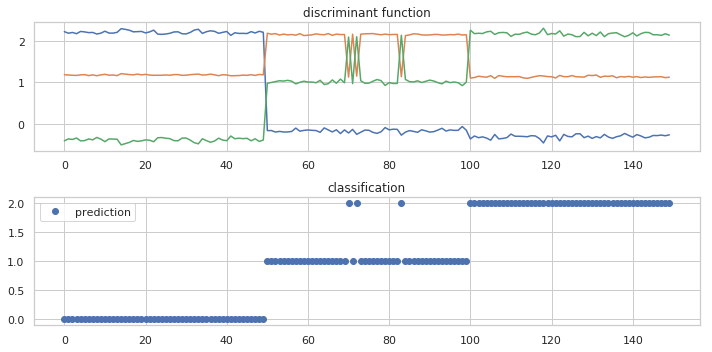

In [31]:
plt.figure(figsize=(10,5))
# 판별 함수
ax1 = plt.subplot(211)
df_m.plot(ax=ax1, legend=False)
plt.title("discriminant function")

# 클래스 판별
ax2 = plt.subplot(212)
df_c.plot(marker='o', ls="", ax=ax2, legend=False)
plt.title("classification")

plt.tight_layout()
plt.show()

## 2. OvR(One vs the Rest)
- 1:the rest
- K개의 클래스의 경우, 해당 클래스(y=1) vs ~해당 클래스(y=0)으로 이진분류 문제
- tie clase: 조건부 확률값 핪산
- 코드
    - `OneVsRestClassifier`
    - `decision_function`

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# Training
# OneVsRestClassifier로 wrapping -> 실제로는 LogisticRegression
model_ovr = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target)
# model의 decision function
# 149번 샘플의 클래스 0, 1, 2에 대한 조건부 확률값
df_m = pd.DataFrame(model_ovr.decision_function(iris.data))
df_m.tail(2)

,0,1,2
148,-6.766841,-1.861501,2.202729
149,-6.287044,-0.814566,1.309719


In [33]:
# classification
df_c = pd.DataFrame(model_ovr.predict(iris.data), columns=['prediction'])
df_c.tail(2)

,prediction
148,2
149,2


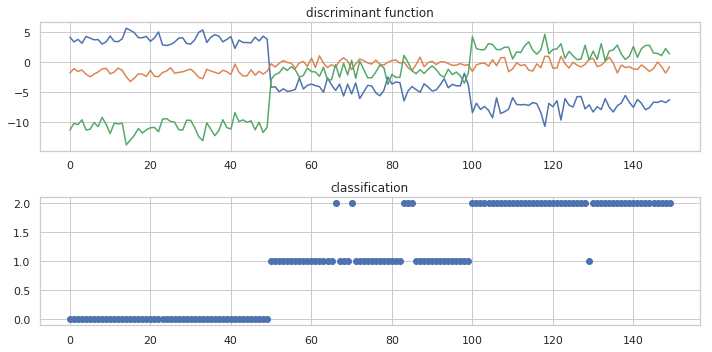

In [37]:
plt.figure(figsize=(10, 5))
# 판별 함수
ax1 = plt.subplot(211)
df_m.plot(legend=False, ax=ax1)
plt.title("discriminant function")

# 클래스 판별
ax2 = plt.subplot(212)
df_c.plot(marker='o', ls="", ax=ax2, legend=False)
plt.title("classification")

plt.tight_layout()
plt.show()

# 참조. Label Binarizer
- label을 one-hot-encoding
- 코드
    - `from sklearn import preprocessing`
    - `lb = preprocessing.LabelBinarizer()`
    - `lb.fit(iris.target)`
    - `lb.classes_`
    - `lb.fit_transform(iris.target)`
    

In [41]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(iris.target), lb.classes_

(LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False),
 array([0, 1, 2]))

In [51]:
ohe = lb.fit_transform(iris.target)
ohe[:4]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [72]:
pd.DataFrame(ohe).tail(2)

,0,1,2
148,0,0,1
149,0,0,1
